<a href="https://colab.research.google.com/github/1amkrs/Trading_bot/blob/main/Trading_bot_documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL-Tutorials/blob/master/2-Advance/FinRL_Ensemble_StockTrading_ICAIF_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Reinforcement Learning for Stock Trading from Scratch: Multiple Stock Trading Using Ensemble Strategy

Tutorials to use OpenAI DRL to trade multiple stocks using ensemble strategy in one Jupyter Notebook | Presented at ICAIF 2020

* This notebook is the reimplementation of our paper: Deep Reinforcement Learning for Automated Stock Trading: An Ensemble Strategy, using FinRL.
* Check out medium blog for detailed explanations: https://medium.com/@ai4finance/deep-reinforcement-learning-for-automated-stock-trading-f1dad0126a02
* Please report any issues to our Github: https://github.com/AI4Finance-LLC/FinRL-Library/issues
* **Pytorch Version**



# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Build Environment](#4)  
    * [5.1. Training & Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)             

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for single stock trading. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A includes three actions: a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying one stock. Also, an action can be carried upon multiple shares. We use
an action space {−k, ..., −1, 0, 1, ..., k}, where k denotes the number of shares. For example, "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* Reward function: r(s, a, s′) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio
values at state s′ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [14]:
!pip install setuptools==64.0.2
!apt-get install swig
!pip install wrds
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cvxpy 1.3.3 requires setuptools>65.5.1, but you have setuptools 64.0.2 which is incompatible.


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 32 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (2,105 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubu

In [15]:
!pip install fastapi
!pip install kaleido
!pip install uvicorn
!pip install python-multipart

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 927.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 6.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them.
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

<a id='1.4'></a>
## 2.4. Create Folders

In [22]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).




-----
class YahooDownloader:
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()
        Fetches data from yahoo API


In [23]:
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
dow_30 = pd.read_csv('dow_30_index.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'dow_30_index.csv'

In [25]:
dow_30_ticker = dow_30['TICKER']


NameError: name 'dow_30' is not defined

In [21]:
print(DOW_30__TICKER)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'DOW_30__TICKER' is not defined

In [28]:
!pip show alpaca-trade-api


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Name: alpaca-trade-api
Version: 3.2.0
Summary: Alpaca API python client
Home-page: https://github.com/alpacahq/alpaca-trade-api-python
Author: Alpaca
Author-email: oss@alpaca.markets
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, deprecation, msgpack, numpy, pandas, PyYAML, requests, urllib3, websocket-client, websockets
Required-by: finrl


In [29]:
!pip install alpaca-trade-api


In [36]:
!pip install alpaca-trade-api


In [37]:
from alpaca_trade_api.rest import Alpaca


ImportError: cannot import name 'Alpaca' from 'alpaca_trade_api.rest' (/usr/local/lib/python3.10/dist-packages/alpaca_trade_api/rest.py)

In [38]:
api = Alpaca(ALPACA_API_KEY, ALPACA_SECRET_KEY, base_url='https://paper-api.alpaca.markets')



NameError: name 'Alpaca' is not defined

In [35]:
import alpaca_trade_api as tradeapi
import pandas as pd
from datetime import datetime

# Set your Alpaca API key and secret
ALPACA_API_KEY = 'PKEAJ2LLCF4AMKS7HACZ'
ALPACA_SECRET_KEY = 'DBNC1UxOeQI5QVLIR1qVnrPTogZUFHXKUqUd3xpT'

# Set the time frame for training and testing
TRAIN_START_DATE = '2009-04-01'
TRAIN_END_DATE = '2024-02-01'
TEST_START_DATE = '2021-01-01'
TEST_END_DATE = '2024-02-01'


# Initialize Alpaca API
api = tradeapi.Alpaca(ALPACA_API_KEY, ALPACA_SECRET_KEY, base_url='https://paper-api.alpaca.markets')

# Function to fetch data from Alpaca API
def fetch_alpaca_data(start_date, end_date, symbols):
    data = pd.DataFrame()
    for symbol in symbols:
        symbol_data = api.get_barset(symbol, 'day', limit=None, start=start_date, end=end_date).df[symbol]
        data = pd.concat([data, symbol_data], axis=1)

    return data

train_df = fetch_alpaca_data(TRAIN_START_DATE, TRAIN_END_DATE, DOW_30_TICKER)

test_df = fetch_alpaca_data(TEST_START_DATE, TEST_END_DATE, DOW_30_TICKER)

AttributeError: module 'alpaca_trade_api' has no attribute 'Alpaca'

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2009-04-01,3.717500,3.892857,3.710357,3.290512,589372000,AAPL,2
1,2009-04-01,48.779999,48.930000,47.099998,35.014801,10850100,AMGN,2
2,2009-04-01,13.340000,14.640000,13.080000,11.563836,27701800,AXP,2
3,2009-04-01,34.520000,35.599998,34.209999,26.850752,9288800,BA,2
4,2009-04-01,27.500000,29.520000,27.440001,19.333204,15308300,CAT,2


In [ ]:
df.tail()

,date,open,high,low,close,volume,tic,day
109507,2024-01-31,504.510010,515.000000,504.510010,511.739990,5358100,UNH,2
109508,2024-01-31,277.119995,279.989990,273.179993,273.260010,6139300,V,2
109509,2024-01-31,42.189999,43.209999,42.040001,42.349998,23392300,VZ,2
109510,2024-01-31,22.840000,23.320000,22.469999,22.570000,60298100,WBA,2
109511,2024-01-31,167.800003,167.800003,165.110001,165.250000,8711600,WMT,2


In [ ]:
df.shape

(109512, 8)

In [ ]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2009-04-01,3.717500,3.892857,3.710357,3.290512,589372000,AAPL,2
1,2009-04-01,48.779999,48.930000,47.099998,35.014801,10850100,AMGN,2
2,2009-04-01,13.340000,14.640000,13.080000,11.563836,27701800,AXP,2
3,2009-04-01,34.520000,35.599998,34.209999,26.850752,9288800,BA,2
4,2009-04-01,27.500000,29.520000,27.440001,19.333204,15308300,CAT,2


In [ ]:
len(df.tic.unique())

30

In [ ]:
df.tic.value_counts()

tic
AAPL    3734
AMGN    3734
AXP     3734
BA      3734
CAT     3734
CRM     3734
CSCO    3734
CVX     3734
DIS     3734
GS      3734
HD      3734
HON     3734
IBM     3734
INTC    3734
JNJ     3734
JPM     3734
KO      3734
MCD     3734
MMM     3734
MRK     3734
MSFT    3734
NKE     3734
PG      3734
TRV     3734
UNH     3734
V       3734
VZ      3734
WBA     3734
WMT     3734
DOW     1226
Name: count, dtype: int64

# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.

In [ ]:
 INDICATORS = ['macd',
               'rsi_30',
               'cci_30',
               'dx_30']

In [ ]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


In [ ]:
processed.sample(5)

,date,open,high,low,close,volume,tic,day,macd,rsi_30,cci_30,dx_30,turbulence
38549,2014-07-14,87.459999,87.489998,86.660004,79.587250,4012300,DIS,0,0.944180,60.907810,118.510254,35.848198,16.077394
13985,2011-03-01,104.070000,104.989998,102.839996,61.864449,12266900,CVX,1,1.573495,71.957182,189.864458,66.999717,38.995783
12978,2011-01-07,44.540001,44.590000,42.650002,30.365931,69579400,JPM,4,0.826163,59.616247,105.659261,23.643339,16.418897
104841,2023-08-11,53.349998,53.950001,53.189999,52.991955,14342200,CSCO,4,0.577701,60.402362,118.754758,31.807084,15.699661
91240,2021-09-29,55.619999,55.980000,55.340000,51.441235,14051700,CSCO,2,-0.402549,46.995293,-114.777958,12.275042,20.907058


<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,…,-1, 0, 1, …, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

In [ ]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 29, State Space: 175


In [ ]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "print_verbosity":5

}

<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

* In this notebook, we are training and validating 3 agents (A2C, PPO, DDPG) using Rolling-window Ensemble Method ([reference code](https://github.com/AI4Finance-LLC/Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020/blob/80415db8fa7b2179df6bd7e81ce4fe8dbf913806/model/models.py#L92))

In [ ]:
rebalance_window = 63 #63 # rebalance_window is the number of days to retrain the model
validation_window = 63 #63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window,
                 validation_window=validation_window,
                 **env_kwargs)



In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.005,
                    'learning_rate': 0.0007
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2, #2048
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 1, #10_000
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 1, #10_000 each
                 'ppo' : 1,
                 'ddpg' : 1
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  200.79519378050182
======Model training from:  2009-04-01 to  2021-01-04
======A2C Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cuda device
Logging to tensorboard_log/a2c/a2c_126_1
======A2C Validation from:  2021-01-04 to  2021-04-06
A2C Sharpe Ratio:  0.1610750466233685
======PPO Training========
{'ent_coef': 0.01, 'n_steps': 2, 'learning_rate': 0.00025, 'batch_size': 128}
Using cuda device
Logging to tensorboard_log/ppo/ppo_126_1
------------------------------------
| time/              |             |
|    fps             | 67          |
|    iterations      | 1           |
|    time_elapsed    | 0           |
|    total_timesteps | 2           |
| train/             |             |
|    reward          | 0.034384586 |
------------------------------------
======PPO Validation from:  2021-01-04 to  2021-04-06
PPO Sharpe Ratio:  0.2696014603029802
======DDPG Training========
{'

In [ ]:
df_summary

,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,DDPG Sharpe
0,126,2021-01-04,2021-04-06,PPO,0.161075,0.269601,0.259398
1,189,2021-04-06,2021-07-06,A2C,0.200464,0.062188,0.148901
2,252,2021-07-06,2021-10-04,DDPG,-0.136716,-0.155841,0.024857
3,315,2021-10-04,2022-01-03,DDPG,0.11421,0.263296,0.494162
4,378,2022-01-03,2022-04-04,DDPG,-0.133079,-0.138583,-0.072173
5,441,2022-04-04,2022-07-06,PPO,-0.224733,-0.192033,-0.215244
6,504,2022-07-06,2022-10-04,DDPG,-0.240259,-0.219489,-0.105098
7,567,2022-10-04,2023-01-04,A2C,0.257067,0.131089,0.149217
8,630,2023-01-04,2023-04-05,DDPG,-0.022499,-0.046212,0.18128
9,693,2023-04-05,2023-07-07,PPO,-0.052883,0.04335,-0.112719


<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

In [ ]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

In [ ]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    df_account_value = pd.concat([df_account_value, temp], ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  0.017286919984008033


In [ ]:
df_account_value.head()

,account_value,date,daily_return,datadate
0,1.000000e+06,2021-04-06,NaN,2021-04-06
1,1.000272e+06,2021-04-07,0.000272,2021-04-07
2,1.000255e+06,2021-04-08,-0.000017,2021-04-08
3,1.003485e+06,2021-04-09,0.003230,2021-04-09
4,1.003125e+06,2021-04-12,-0.000359,2021-04-12


<Axes: >

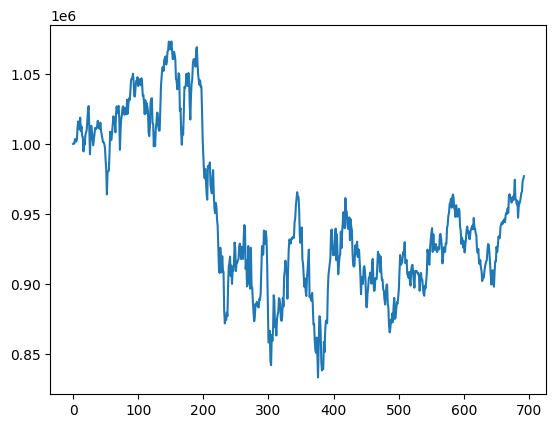

In [ ]:
%matplotlib inline
df_account_value.account_value.plot()

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return         -0.008410
Cumulative returns    -0.022958
Annual volatility      0.148500
Sharpe ratio           0.017287
Calmar ratio          -0.037680
Stability              0.347922
Max drawdown          -0.223197
Omega ratio            1.002953
Sortino ratio          0.023946
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.932524
Daily value at risk   -0.018699
dtype: float64


In [13]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========


NameError: name 'get_baseline' is not defined

In [39]:
!pip install pyfolio

In [40]:
import pyfolio


In [1]:
from your_module import backtest_plot

ModuleNotFoundError: No module named 'your_module'

<a id='6.2'></a>
## 7.2 BackTestPlot

In [12]:
backtest_plot(df_account_value,
              baseline_ticker = '^DJI',
              baseline_start = df_account_value.loc[0,'date'],
              baseline_end = df_account_value.loc[len(df_account_value)-1,'date'],
              pyfolio_format=True)

NameError: name 'backtest_plot' is not defined

In [3]:
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
import datetime as datetime
from alpaca.data.live import StockDataStream
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce
from alpaca.trading.requests import LimitOrderRequest
# #I make a cryptocurrency trading bot and hand it a $1000 dollars and leave it to trade that unsupervised for a week.

# # paper=True enables paper trading
trading_client = TradingClient('PKEAJ2LLCF4AMKS7HACZ', 'DBNC1UxOeQI5QVLIR1qVnrPTogZUFHXKUqUd3xpT', paper=False)


##Market Order
# preparing orders
market_order_data = MarketOrderRequest(
                    symbol="BTC/USD",
                    qty=1,
                    side=OrderSide.SELL,
                    time_in_force=TimeInForce.DAY
                    )

# Market order
market_order = trading_client.submit_order(
                order_data=market_order_data
               )

# if(DRLEnsembleAGent.Sharpe > .4)

# # Market order
# market_order = trading_client.submit_order(fndsdsdsfdsdsf
#                 order_data=market_order_data
#                )

# else

# print(no trades for today)



ModuleNotFoundError: No module named 'alpaca'

In [4]:
!pip install alpaca-py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.14
    Uninstalling pydantic-1.10.14:
      Successfully uninstalled pydantic-1.10.14
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-

In [5]:
!pip install alpaca

  Preparing metadata (setup.py) ... done
  Created wheel for alpaca: filename=alpaca-1.0.0-py3-none-any.whl size=14064 sha256=012f5a77861f196aa8b75dc49ff9b671f0304641155081a8e4823881d82876c5
  Stored in directory: /root/.cache/pip/wheels/4a/26/e0/b1ae89a6dc93defaa52a502f261a1680d96d9a7a9539baca48
Successfully built alpaca


In [6]:
!pip install pydantic


In [7]:
!jupyter notebook restart

[C 07:31:32.742 NotebookApp] No such file or directory: /content/restart


In [12]:
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
import datetime as datetime
from alpaca.data.live import StockDataStream
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce
from alpaca.trading.requests import LimitOrderRequest

# #I make a cryptocurrency trading bot and hand it a $1000 dollars and leave it to trade that unsupervised for a week.

# # paper=True enables paper trading
trading_client = TradingClient('PK46ZDOR9DH4UPD739XA', 'DBNC1UxOeQI5QVLIR1qVnrPTogZUFHXKUqUd3xpT', paper=True)


##Market Order
# preparing orders
market_order_data = MarketOrderRequest(
                    symbol="NVDA",
                    qty=20,
                    side=OrderSide.BUY,
                    time_in_force=TimeInForce.DAY
                    )

# Market order
market_order = trading_client.submit_order(
                order_data=market_order_data
               )


## Twitter Sentiment Analysis

# limit_order_data = LimitOrderRequest(
#                     symbol="BTC/USD",
#                     limit_price=17000,
#                     notional=4000,
#                     side=OrderSide.SELL,
#                     time_in_force=TimeInForce.FOK
#                    )

# # Limit order
# limit_order = trading_client.submit_order(
#                 order_data=limit_order_data
#               )

# wss_client = StockDataStream('AKIQ3ALAC0B2HOM1PPNE', 'dMekSYsqKqyoF6WM4lJ8YnE92ERDxeQVrhvrjAxa')

# # async handler
# async def quote_data_handler(data):